**input data , 원시 데이터들의 이해, EDA 필요**

무엇에 관한 데이터인가?


어떤식으로 되어있는지? 얼마나 불균형이 있는지?



**1. 무엇에 관한 데이터인가?**

**ant-1.3.csv :**

Apache Ant 프로젝트의 각 클래스가 결함을 포함하고 있는지를 예측하기 위한 소프트웨어 결함 예측 데이터셋


ant-1.3.csv → Apache Ant 버전 1.3

ant-1.7.csv → Apache Ant 버전 1.7


나머지 파일들도 동일


**camel-1.0.csv :**

Apache Camel 소프트웨어 프로젝트의 버전 1.0 결함 예측 데이터셋


**Apache Ant**

→ 자바(Java) 기반 빌드 자동화 도구

→ 소프트웨어 컴파일, 테스트, 배포 과정을 스크립트로 자동화하는 프로젝트

**Apache Camel**

→ 엔터프라이즈 통합 프레임워크(EIP)

→ 서로 다른 시스템·서비스를 메시지 기반으로 연결/연동하는 미들웨어

**결론:**

input_data들은
 실제 산업 현장에서 널리 사용된 대규모 오픈소스 소프트웨어 프로젝트이며, 그 코드 품질(결함 여부)을 예측하기 위해 만들어진 데이터셋


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**데이터 EDA**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [ ]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/인공지능응용/input_data/input_data"

files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(".csv")])
print(f"총 데이터셋 수: {len(files)}")
files


총 데이터셋 수: 15


['ant-1.3.csv',
 'ant-1.4.csv',
 'ant-1.5.csv',
 'ant-1.6.csv',
 'ant-1.7.csv',
 'camel-1.0.csv',
 'camel-1.2.csv',
 'camel-1.4.csv',
 'camel-1.6.csv',
 'ivy-1.4.csv',
 'ivy-2.0.csv',
 'jedit-3.2.csv',
 'jedit-4.0.csv',
 'jedit-4.1.csv',
 'jedit-4.2.csv']

In [ ]:
#데이터 로드 + 기본 요약 테이블 생성

datasets = {}
summary = []

for f in files:
    df = pd.read_csv(os.path.join(DATA_DIR, f))

    # 불필요 컬럼 제거
    df = df.drop(columns=["name", "version", "name.1"], errors="ignore")

    # bug 이진화
    df["bug"] = (df["bug"] > 0).astype(int)

    datasets[f.replace(".csv","")] = df

    n_total = len(df)
    n_defect = df["bug"].sum()
    defect_ratio = n_defect / n_total

    summary.append([f.replace(".csv",""), n_total, n_defect, defect_ratio])

summary_df = pd.DataFrame(
    summary,
    columns=["dataset", "instances", "defects", "defect_ratio"]
)

summary_df


,dataset,instances,defects,defect_ratio
0,ant-1.3,125,20,0.160000
1,ant-1.4,178,40,0.224719
2,ant-1.5,293,32,0.109215
3,ant-1.6,351,92,0.262108
4,ant-1.7,745,166,0.222819
5,camel-1.0,339,13,0.038348
6,camel-1.2,608,216,0.355263
7,camel-1.4,872,145,0.166284
8,camel-1.6,965,188,0.194819
9,ivy-1.4,241,16,0.066390


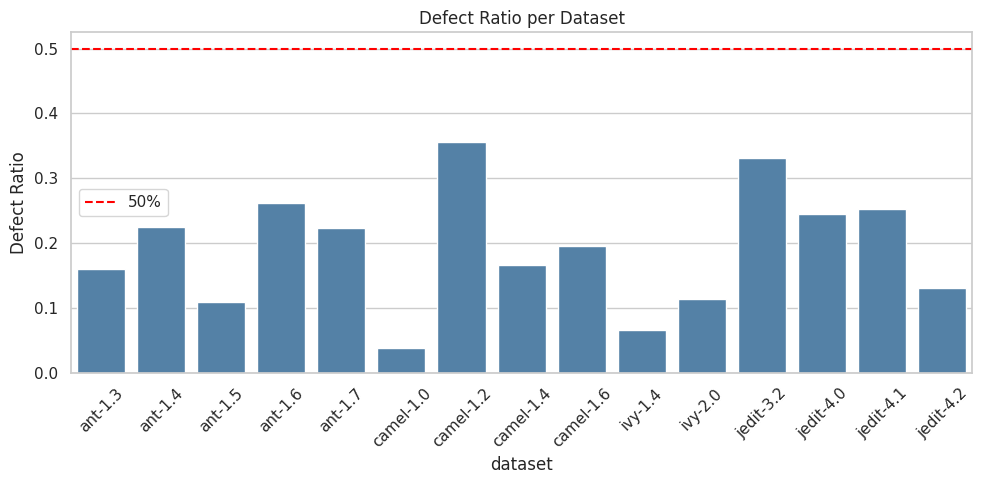

In [ ]:
#데이터셋별 defect ratio

plt.figure(figsize=(10,5))
sns.barplot(
    data=summary_df,
    x="dataset",
    y="defect_ratio",
    color="steelblue"
)
plt.axhline(0.5, linestyle="--", color="red", label="50%")
plt.xticks(rotation=45)
plt.title("Defect Ratio per Dataset")
plt.ylabel("Defect Ratio")
plt.legend()
plt.tight_layout()
plt.show()


SyntaxError: keyword argument repeated: linestyle (ipython-input-169958419.py, line 8)

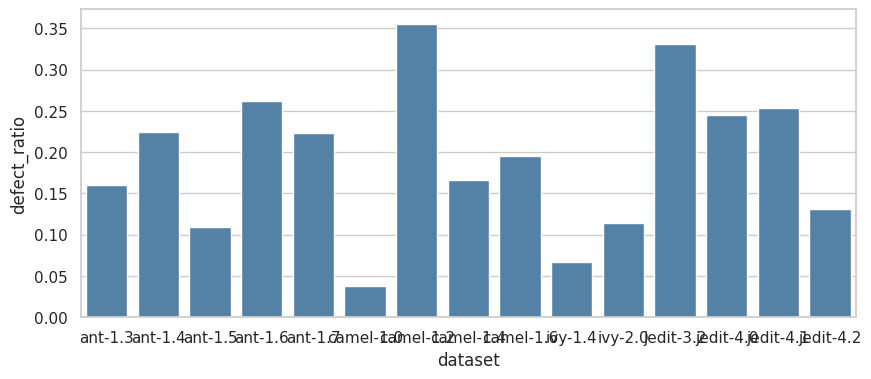

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=summary_df,
    x="dataset",
    y="defect_ratio",
    color="steelblue"
)
plt.axhline(0.5, linestyle="--", color="red", linestyle="--", label="50%")
plt.xticks(rotation=45)
plt.title("Defect Ratio per Dataset")
plt.ylabel("Defect Ratio")
plt.legend()
plt.tight_layout()
plt.show()


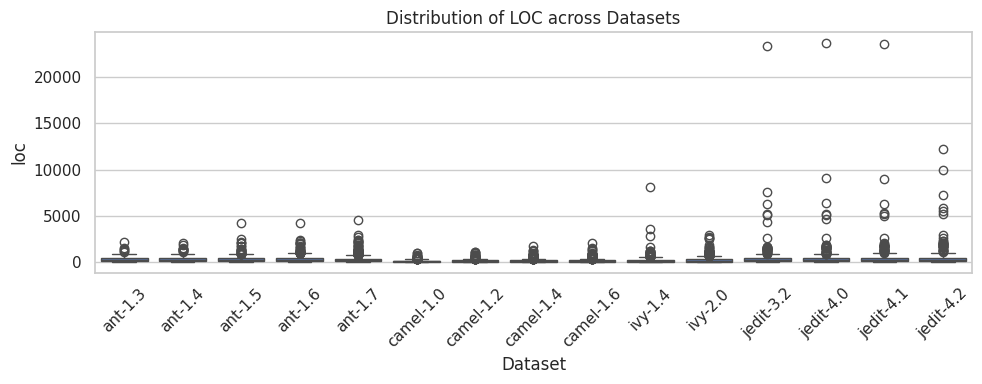

In [ ]:
combined = []

for f in files:
    df = pd.read_csv(os.path.join(DATA_DIR, f))
    df = df.drop(columns=["name", "version", "name.1"], errors="ignore")

    if "loc" not in df.columns:
        continue

    temp = df[["loc"]].copy()
    temp["Dataset"] = f.replace(".csv","")
    combined.append(temp)

combined_df = pd.concat(combined, ignore_index=True)

plt.figure(figsize=(10,4))
sns.boxplot(
    data=combined_df,
    x="Dataset",
    y="loc"
)
plt.xticks(rotation=45)
plt.title("Distribution of LOC across Datasets")
plt.tight_layout()
plt.show()
